# CS3315 Project Unsupervised Learning

* Train two models: K-means and isolation forest
* K-means would require additional data analysis/interpretation (i.e. what additional insights does clustering provide outside of the labels?)
*Isolation forest - interpolate some kind of "badness" score from the features? (i.e. discovery of new label)]

Code framework from https://github.com/ageron/handson-ml2/blob/master/09_unsupervised_learning.ipynb

In [18]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

### K-Means Clustering

In [19]:
# import data to dataframe

filename = '/content/2020.06.19.csv'
df = pd.read_csv(filename)
#df.set_index('avg_ipt',inplace=True)
# df.info()
# df.head(4)

In [20]:
df.dropna(inplace=True)
df.isna().sum()

avg_ipt          0
bytes_in         0
bytes_out        0
dest_ip          0
dest_port        0
entropy          0
num_pkts_out     0
num_pkts_in      0
proto            0
src_ip           0
src_port         0
time_end         0
time_start       0
total_entropy    0
label            0
duration         0
dtype: int64

In [21]:
#one hot encoding for labels

print('label values:', df['label'].unique())

def ordinal_encoder(category):
    dict = {'benign':0, 'outlier':1, 'malicious':2}
    return dict[category]

print('benign', ordinal_encoder('benign'))
print('outlier', ordinal_encoder('outlier'))
print('malicious', ordinal_encoder('malicious'))
df['label'] = df['label'].apply(ordinal_encoder)

label values: ['benign' 'outlier' 'malicious']
benign 0
outlier 1
malicious 2


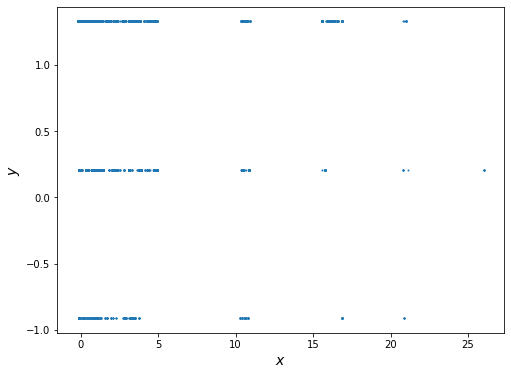

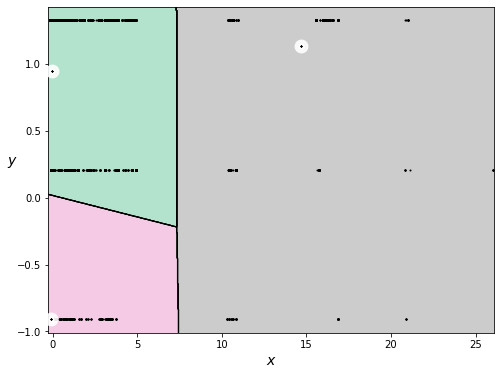

In [28]:
#destination ip and labels

features = ['dest_ip',
            'label']

X = df.loc[:, features]

# Scale features
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)


#plotting the data on a scatterplot
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x$", fontsize=14)
    plt.ylabel("$y$", fontsize=14, rotation=90)

plt.figure(figsize=(8, 6))
plot_clusters(X)
plt.show()

#applying k-means to the scatterplot
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$y$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 6))
plot_decision_boundaries(kmeans, X)
plt.show()

In [23]:
#calculating inertia

kmeans.score(X)

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

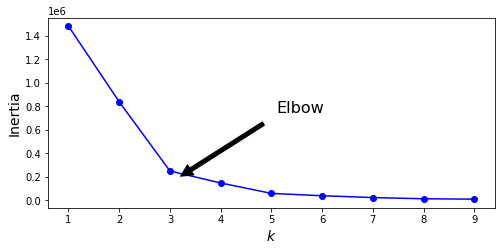

In [24]:
#plotting inertia

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis()
plt.show()

In [25]:
# The following is the code of to calculate the silhouette score and graph,
# commented out because it takes 1.5 - 2 hours to run the silhourette score
# and over 7.5 hours to calculate the graph. We never ran the graph to completion
# due to how long it would take.

# from sklearn.metrics import silhouette_score


# silhouette_score(X, kmeans.labels_)

# silhouette_score k=5 = 0.6799252733420575

In [26]:
# silhouette_scores = [silhouette_score(X, model.labels_)
#                      for model in kmeans_per_k[1:]]
                     
# plt.figure(figsize=(8, 3))
# plt.plot(range(2, 10), silhouette_scores, "bo-")
# plt.xlabel("$k$", fontsize=14)
# plt.ylabel("Silhouette score", fontsize=14)
# plt.axis()
# plt.show()

In [27]:
# from sklearn.metrics import silhouette_samples
# from matplotlib.ticker import FixedLocator, FixedFormatter

# plt.figure(figsize=(11, 9))

# for k in (3, 4, 5, 6):
#     plt.subplot(2, 2, k - 2)
    
#     y_pred = kmeans_per_k[k - 1].labels_
#     silhouette_coefficients = silhouette_samples(X, y_pred)

#     padding = len(X) // 30
#     pos = padding
#     ticks = []
#     for i in range(k):
#         coeffs = silhouette_coefficients[y_pred == i]
#         coeffs.sort()

#         color = mpl.cm.Spectral(i / k)
#         plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
#                           facecolor=color, edgecolor=color, alpha=0.7)
#         ticks.append(pos + len(coeffs) // 2)
#         pos += len(coeffs) + padding

#     plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
#     plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
#     if k in (3, 5):
#         plt.ylabel("Cluster")
    
#     if k in (5, 6):
#         plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
#         plt.xlabel("Silhouette Coefficient")
#     else:
#         plt.tick_params(labelbottom=False)

#     plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
#     plt.title("$k={}$".format(k), fontsize=16)

# plt.show()